# Решение задачи 2 по физико-химической гидрогеодинамике с помощью численного расчета преобразования Лапласа-Карсона
## Обработка опыта с большим монолитом

In [31]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
from scipy.optimize import curve_fit
from scipy.special import erfc
from matplotlib import rcParams

In [485]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [45/2.54, 25/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)

# Подготовка данных
## Расчет безразмерных концентраций

In [484]:
# bound = 0.08# g/l
# x = 1.2 #meters
# num_data_

points = 13 # number of data points including initial conditions
# list1 = [11,10.10,8.79,7.34,5.85,4.51,3.38,2.47,1.75,1.28,0.90,0.64,0.44]
# #data = np.array(list)
# # Create DataFrame 
# df = pd.DataFrame({'TimeDays': np.linspace(0,num_data_points-1,num_data_points), 'C, g/l':list1}) 
# for i in range(13,1000):
# #    print(i)
#     df.loc[i] = [i,0.08]
# df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())

# # Print the output. 
# pd.set_option('display.max_rows', 20)
# df[:12]
bound = 0.08# g/l
x = 1.2 #meters
num_data_points = 13 # number of data points including initial conditions
list1 = [11,10.10,8.79,7.34,5.85,4.51,3.38,2.47,1.75,1.28,0.90,0.64,0.44]
#num_data_points = 12 # number of data points including initial conditions
#list1 = [10.10,8.79,7.34,5.85,4.51,3.38,2.47,1.75,1.28,0.90,0.64,0.44]#, 0.23, 0.08]
#data = np.array(list)
# Create DataFrame 
df = pd.DataFrame({'TimeDays': np.linspace(0,num_data_points-1,num_data_points), 'C, g/l':list1}) 
for i in range(18,1000):
#    print(i)
    df.loc[i] = [i,0.08]
df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())
pd.options.display.max_rows = 15

# Print the output. 
df[:13] 
#fig, ax= plt.subplots()
#ax.plot(df['TimeDays'],df['c^'], 'o-')
#ax.set_xlabel('Время, сутки')
#ax.set_xlim(0,20)
#ax.set_ylabel('Концентрация, [-]')

,TimeDays,"C, g/l",c^
0,0.0,11.00,-0.000000
1,1.0,10.10,0.082418
2,2.0,8.79,0.202381
3,3.0,7.34,0.335165
4,4.0,5.85,0.471612
5,5.0,4.51,0.594322
6,6.0,3.38,0.697802
7,7.0,2.47,0.781136
8,8.0,1.75,0.847070
9,9.0,1.28,0.890110


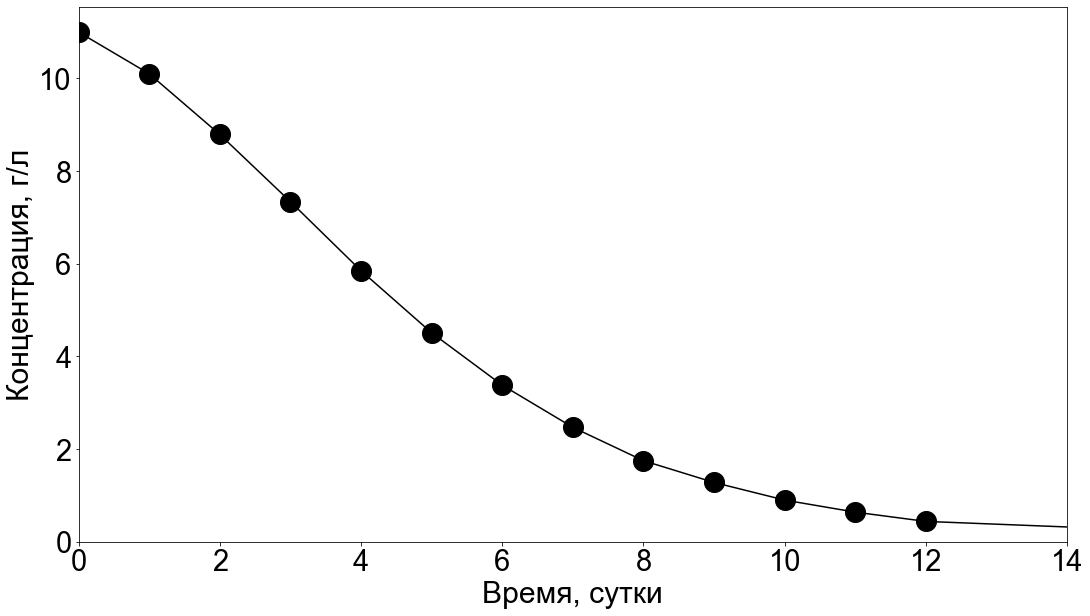

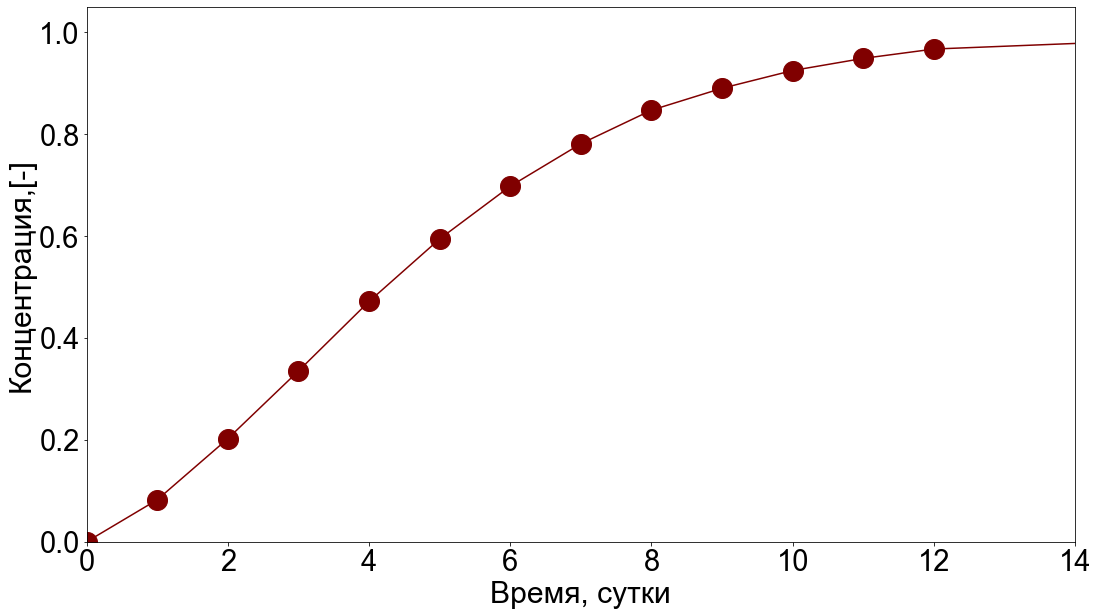

In [577]:
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['C, g/l'].abs(), 'o-', markersize = '20',color = 'black')
ax.set_xlabel('Время, сутки')
ax.set_xlim(0,14)
plt.ylim(0, None)
ax.set_ylabel('Концентрация, г/л')
ax.spines['bottom'].set_position('zero')
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['c^'].abs(), 'o-', markersize = '20',color = 'maroon')
ax.set_xlabel('Время, сутки')
ax.set_xlim(0,14)
plt.ylim(0, None)
ax.set_ylabel('Концентрация,[-]')
ax.spines['bottom'].set_position('zero')

# Преобразование Лапласа-Карсона

In [588]:
s = 15# number of p
power = 1/(s-1)
q = pow(((14/20)*(5/14)), power)

q = round(q,3)
t_C_max = 14# time of max concentration
tmax = t_C_max/5
tmax = round(tmax,2)

t = [tmax  *q**i for i in range(s)]
#t= np.linspace(1,40,s)
t_rounded = [round(num, 1) for num in t]
p = [1/i for i in t]
#p= np.linspace(1,2,s)
#p = [0.357,0.556,1,1.429]
print('p =',p)
print('t =',t_rounded)

#p = [1/7,0.2,0.3,0.8]
#for x in p:
#    print(x)
#p = [0.357,0.556,1,1.429] 

p = [0.35714285714285715, 0.3941974140649637, 0.43509648351541247, 0.4802389442774972, 0.5300650599089374, 0.5850607725264209, 0.6457624420821423, 0.7127620773533578, 0.786713109661543, 0.868336765630842, 0.9584291011377946, 1.0578687650527536, 1.1676255684908978, 1.2887699431466864, 1.4224833809566073]
t = [2.8, 2.5, 2.3, 2.1, 1.9, 1.7, 1.5, 1.4, 1.3, 1.2, 1.0, 0.9, 0.9, 0.8, 0.7]


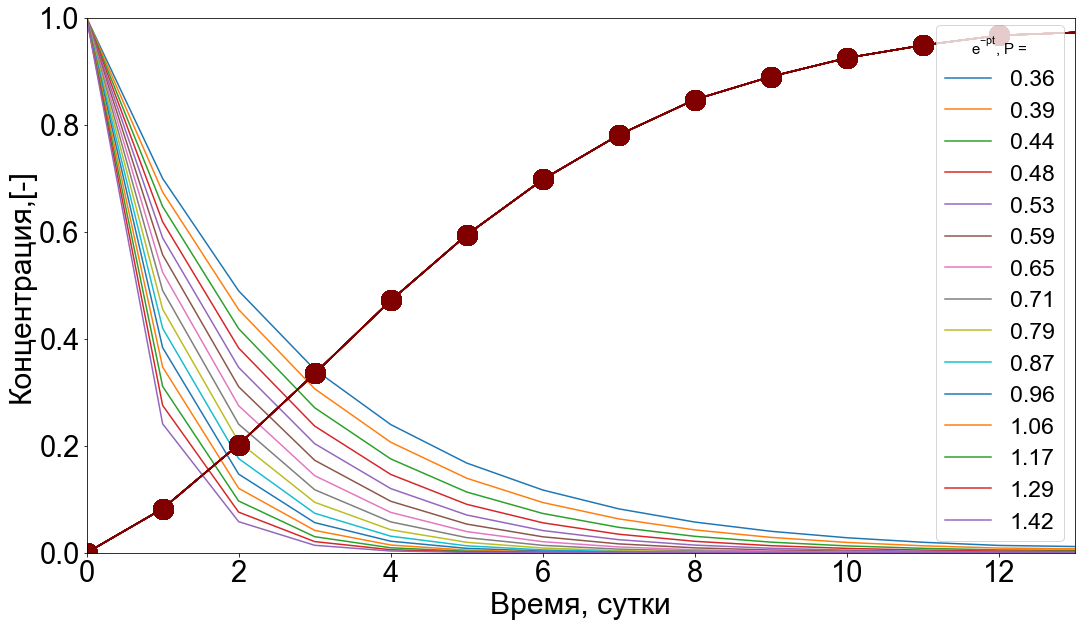

In [584]:
fig, ax= plt.subplots()
for count in p:
    exp_ = np.exp((-count)*df['TimeDays'])
    ax.plot(exp_,label = round(count, 2))
    ax.plot(df['c^'].abs(),'o-',markersize = '20',color = 'maroon')
    plt.axis([0, 13, 0, 1])
ax.set_ylabel('Концентрация,[-]')
ax.set_xlabel('Время, сутки')
ax.legend(title = r'$e^{-pt}$, P = ')

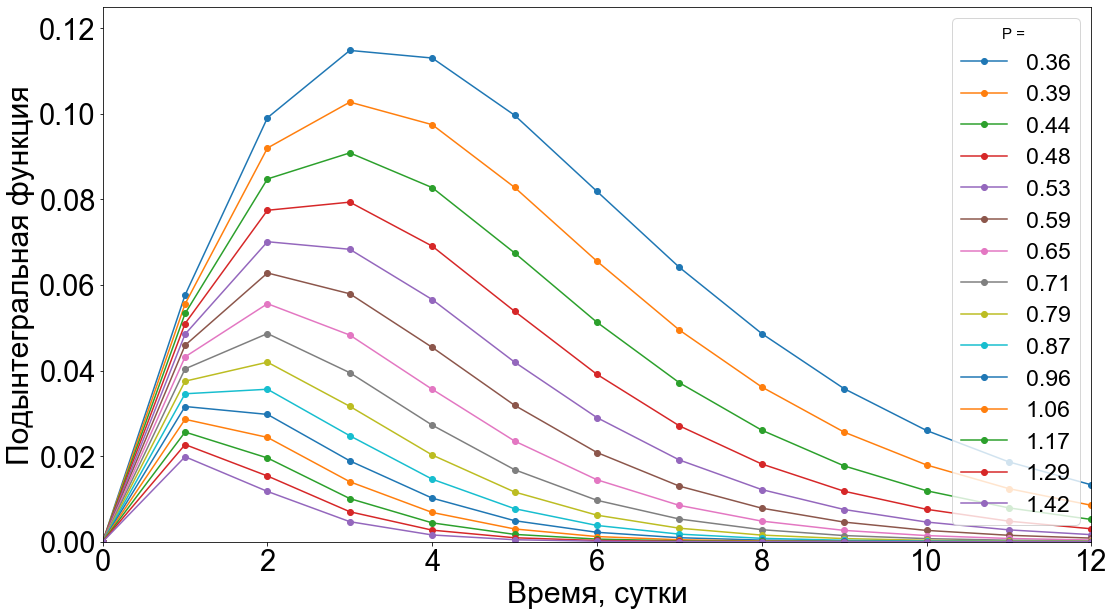

In [538]:
fig, ax= plt.subplots()
integrated = []
for count in p:
    exp_ = np.exp((-count)*df['TimeDays'])
    df['laplace'] = df['c^']*exp_
#    print('exponent = ' + str(df['laplace']))
    plt.plot(df['laplace'],'o-', label = round(count, 2))

    
    #df
    #s = df.apply(lambda g: integrate.trapz(df['laplace'], x=df['TimeDays']))
#    s = integrate.trapz(df['laplace'], x=df['TimeDays'])
    s = integrate.simps(df['laplace'], x=df['TimeDays'], even='avg')
    s = s*count
    integrated.append(s)
#    print('p = ' +str(count) +' int = '+ str(s))
integrated
plt.axis([0, 12, 0, 0.125])
ax.set_ylabel('Подынтегральная функция')
ax.set_xlabel('Время, сутки')
ax.legend(title = 'P = ')

Text(0.5, 0, 'p, 1/сутки, дни')

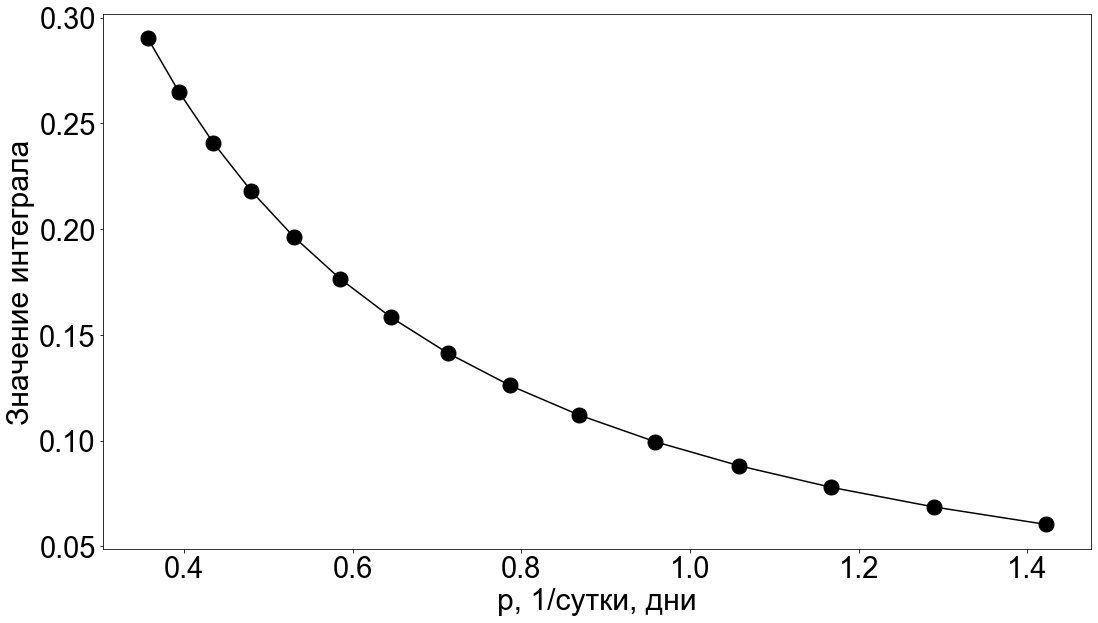

In [574]:
fig, ax= plt.subplots()
ax.plot(p,integrated,'o-', color = 'black',markersize = '15')
ax.set_ylabel('Значение интеграла')
ax.set_xlabel('p, 1/сутки, дни')

In [540]:
df_final = pd.DataFrame({'p, days^-1':p, 'U^':integrated}) 
df_final['p, days^-1']=df_final['p, days^-1'].round(3)
df_final['U^']=df_final['U^'].round(3)
#df_final = pd.DataFrame({'p, days^-1':[0.357,0.556,1.000,1.429], 'U^':[0.288,0.188,0.096,0.063]}) 
#df_final

In [541]:
df_final['a,m-1'] = -1/1.2*np.log(df_final['U^'])
df_final['p/a'] =df_final['p, days^-1']/df_final['a,m-1'] 
df_final

,"p, days^-1",U^,"a,m-1",p/a
0,0.357,0.290,1.031562,0.346077
1,0.394,0.265,1.106688,0.356017
2,0.435,0.241,1.185799,0.366841
3,0.480,0.218,1.269384,0.378136
4,0.530,0.197,1.353793,0.391493
5,0.585,0.177,1.443005,0.405404
6,0.646,0.158,1.537634,0.420126
7,0.713,0.141,1.632496,0.436754
8,0.787,0.126,1.726228,0.455907
9,0.868,0.112,1.824380,0.475778


(0.3, 0.6)

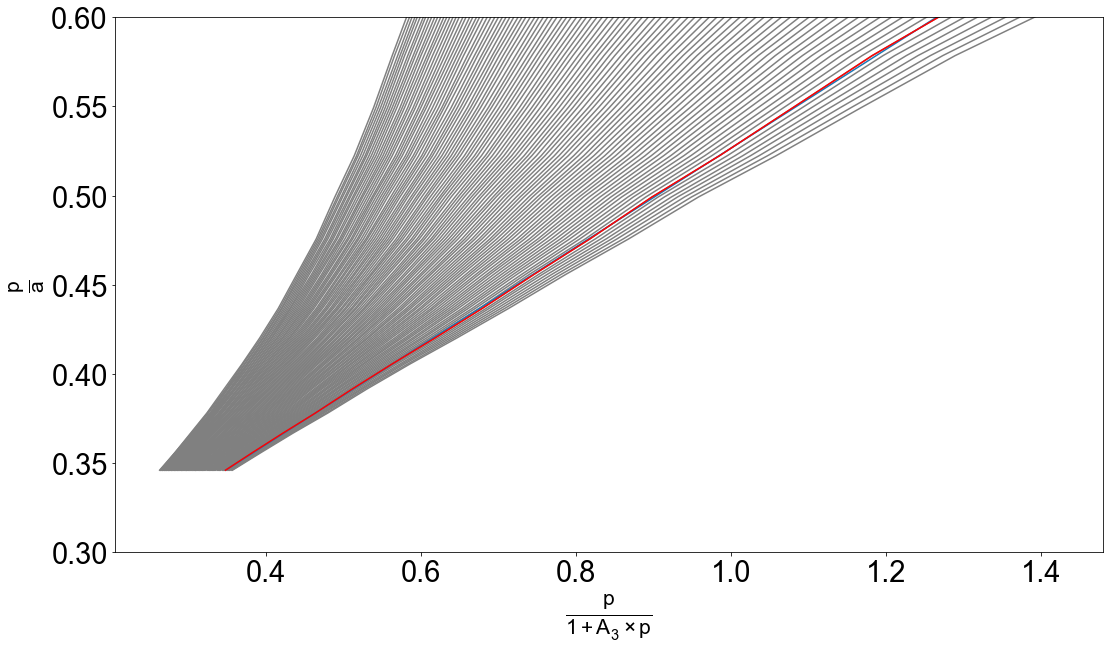

In [573]:
r2 = []
listofslopes = []
listofintercepts = []
fig, ax1= plt.subplots()
A3 = np.linspace(0,1,101)
df_results = pd.DataFrame({'A3': A3 , 'R2':''}) 
for count1 in A3:
    df_final['result'] = (df_final['p, days^-1'].round(3)/(1+count1*df_final['p, days^-1'].round(3))).round(3)
    df_final['result'] = df_final['result'].round(3)
    ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'gray')
    slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'])
    r2.append(r_value**2)
    listofintercepts.append(intercept)
    listofslopes.append(slope)
df_results['R2'] = r2
df_results['slope'] = listofslopes
df_results['intercept'] = listofintercepts
df_results
slope1 = df_results['slope'].loc[df_results['R2'].idxmax()]
intercept1 = df_results['intercept'].loc[df_results['R2'].idxmax()]
ax1.plot((df_final['p/a']-intercept1)/slope1,df_final['p/a'])
#intercepty = slope1*0+intercept1
ax1.set_ylim(bottom = 0)
A3_res = df_results['A3'].loc[df_results['R2'].idxmax()]
df_final['result'] = df_final['p, days^-1']/(1+A3_res*df_final['p, days^-1'])
df_final['result'] = df_final['result'].round(3)
ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'red')
ax1.set_ylabel(r'$\frac{p}{a}$')
ax1.set_xlabel(r'$\frac {p}{1+А_3 \times p}$')
ax1.set_ylim(0.3,0.6)

In [543]:
df_results.loc[df_results['R2'].idxmax()]

A3           0.070000
R2           0.999928
slope        0.277069
intercept    0.249597
Name: 7, dtype: float64

In [551]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(round(n, 2)))
print('k = ' +str(round(k, 2)))
print('alpha = '+str(round(alpha, 2))+ ' 1/сут')

n = 0.4
k = 0.05
alpha = 0.27 1/сут


In [546]:
df_results

,A3,R2,slope,intercept
0,0.00,0.999551,0.246745,0.260280
1,0.01,0.999665,0.250954,0.258741
2,0.02,0.999738,0.255186,0.257292
3,0.03,0.999806,0.259612,0.255670
4,0.04,0.999873,0.264037,0.254022
...,...,...,...,...
96,0.96,0.981784,0.762798,0.126659
97,0.97,0.981773,0.768128,0.125867
98,0.98,0.981043,0.774355,0.124715
99,0.99,0.981016,0.780876,0.123412


In [440]:
pd.set_option('display.max_rows', 101)
df_results


,A3,R2,slope,intercept
0,0.00,0.999474,0.262087,0.251432
1,0.01,0.999565,0.264578,0.251080
2,0.02,0.999646,0.266807,0.250793
3,0.03,0.999714,0.269171,0.250495
4,0.04,0.999763,0.271427,0.250231
5,0.05,0.999810,0.273750,0.249946
6,0.06,0.999838,0.276013,0.249684
7,0.07,0.999858,0.278197,0.249427
8,0.08,0.999856,0.280518,0.249137
9,0.09,0.999846,0.282969,0.248822


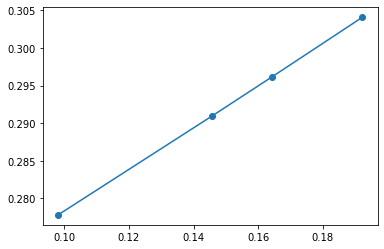

In [333]:
plt.plot(df_final['result'],df_final['p/a'],'o-')

In [182]:
pd.set_option('display.max_rows', 10)
df_results

,A3,R2,slope,intercept
0,0.00,0.998985,0.229330,0.264623
1,0.01,0.999140,0.233496,0.263126
2,0.02,0.999317,0.237645,0.261775
3,0.03,0.999466,0.241834,0.260282
4,0.04,0.999576,0.245938,0.258862
...,...,...,...,...
96,0.96,0.985923,0.727800,0.139453
97,0.97,0.985862,0.731430,0.139336
98,0.98,0.985415,0.738434,0.137963
99,0.99,0.985373,0.744908,0.136290


In [206]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.401058254853647
k = 0.06667859929491535
alpha = 0.24958883388974262


In [332]:
0.0868526565612364*(1-0.0868526565612364)*0.4485852957692019/A3_res

0.1111780422211543

In [205]:
df_final['p/a'] = [0.344,0.398,0.513,]

In [206]:
df_final['p/a']

0    0.344
1    0.398
2    0.513
3    0.622
Name: p/a, dtype: float64

In [ ]:
n = 0.4036690021448831
k = 0.07427333511390906
alpha = 0.23129159661357615

In [496]:
v = 0.1 
x = 1.2
time = df['TimeDays'].to_numpy()
xdata = df['c^'].to_numpy()

In [506]:
def func(time, n,alpha):
    result = []
    result_list = []
    
#    print(chislitel)
    t0 = 0
#    t0 = n*x/v
    for t in time:
        if t0<t:
            chislitel = v*t - x*n
            znamenatel = 2*np.sqrt(v**2/alpha*(1-t0/t)*n*t)
            result = 1 - 0.5*erfc(chislitel/znamenatel)
            
        else:
            result = 0
#        print(result)
        result_list.append(result)
    return result_list

In [507]:
popt, pcov = curve_fit(func, time, xdata, p0 = [ 0.42335248, 0.48221169], bounds=(0, [1., 0.5]))
popt

array([0.3334525 , 0.31591362])

In [125]:
plt.plot(time, func(time, 0.42335248, 0.48221169))
plt.plot(time, xdata)
plt.axis([0, 15, 0, 1.1])

NameError: name 'time' is not defined

In [502]:
df['TimeDays']

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
Name: TimeDays, Length: 13, dtype: float64

In [503]:
df['c^']

0    -0.000000
1     0.082418
2     0.202381
3     0.335165
4     0.471612
        ...   
8     0.847070
9     0.890110
10    0.924908
11    0.948718
12    0.967033
Name: c^, Length: 13, dtype: float64